In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# Reading Data


In [2]:
EdStatsData  = pd.read_csv("EdStatsData.csv")
only_countries = pd.read_csv("EdStatsCountry.csv") # Contains list of countries only excluding region


In [3]:
EdStatsData  = EdStatsData.rename(columns={"Indicator Code": "Indicator_Code"})

# On Validating the quality of this dataset, we can say that it contained a lot of missing values, Especially in the years of 2017 and Above, and these were droped
---
## Missing values in other years were filled using interpolation

### Initially the dataset has 886930 rows × 70 columns
### Selecting the information that seems relevant, we look for those indicators that focus population size and youth most of who are in high school and university

# Since the dataset also contains data related to regions we have to filter so that we remain with data related to countries only
---

In [4]:
EdStatsData = EdStatsData.loc[EdStatsData['Country Code'].isin(only_countries["Country Code"])]

# potential population indicators

In [5]:
population_indicators = ["SP.POP.TOTL", "SP.POP.GROW", "SP.POP.1524.TO.UN", "SP.SEC.TOTL.IN", "SP.SEC.UTOT.IN", 
                         "SP.TER.TOTL.IN"]

# First Indicator (Total Population)

In [6]:
ind1 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[0]] 
ind1

,Country Name,Country Code,Indicator Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97823,Albania,ALB,"Population, total",SP.POP.TOTL,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101488,Algeria,DZA,"Population, total",SP.POP.TOTL,14550034.0,14960109.0,15377093.0,15804428.0,16247113.0,16709099.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105153,American Samoa,ASM,"Population, total",SP.POP.TOTL,27292.0,27916.0,28492.0,29014.0,29488.0,29932.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108818,Andorra,AND,"Population, total",SP.POP.TOTL,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871138,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,63000.0,71000.0,76000.0,84000.0,90000.0,94000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,6193810.0,6300554.0,6407295.0,6523452.0,6661566.0,6830692.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4173928.0,4317748.0,4469895.0,4629402.0,4794754.0,4964831.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Droping columns with nan

In [7]:
ind1 = ind1.dropna(axis=1, how='all') #Droping nan columns

# Using Interporation to fill the remaining nan's

In [8]:
ind1 = ind1.interpolate(method ='linear', limit_direction ='backward', limit = 1)
ind1

,Country Name,Country Code,Indicator Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
94158,Afghanistan,AFG,"Population, total",SP.POP.TOTL,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
97823,Albania,ALB,"Population, total",SP.POP.TOTL,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
101488,Algeria,DZA,"Population, total",SP.POP.TOTL,14550034.0,14960109.0,15377093.0,15804428.0,16247113.0,16709099.0,...,34300076.0,34860715.0,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0
105153,American Samoa,ASM,"Population, total",SP.POP.TOTL,27292.0,27916.0,28492.0,29014.0,29488.0,29932.0,...,57903.0,57030.0,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0
108818,Andorra,AND,"Population, total",SP.POP.TOTL,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871138,Virgin Islands (U.S.),VIR,"Population, total",SP.POP.TOTL,63000.0,71000.0,76000.0,84000.0,90000.0,94000.0,...,107423.0,107091.0,106707.0,106267.0,105784.0,105275.0,104737.0,104170.0,103574.0,102951.0
874803,West Bank and Gaza,PSE,"Population, total",SP.POP.TOTL,3128405.0,3185777.0,3241647.5,3303726.0,3375783.0,3462346.0,...,3494496.0,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0,4551566.0
878468,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,6193810.0,6300554.0,6407295.0,6523452.0,6661566.0,6830692.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,4173928.0,4317748.0,4469895.0,4629402.0,4794754.0,4964831.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


# Check if all the nan's are filled with values

In [9]:
ind1 = ind1.T # Transposing the dataset
percent_missing = ind1.isnull().sum() * 100 / len(ind1)
missing_value_df = pd.DataFrame({'column_name': ind1.columns,
                                 'percent_missing': percent_missing})
# ind1 = ind1.T
missing_value_df


,column_name,percent_missing
94158,94158,0.0
97823,97823,0.0
101488,101488,0.0
105153,105153,0.0
108818,108818,0.0
...,...,...
871138,871138,0.0
874803,874803,0.0
878468,878468,0.0
882133,882133,0.0


# Starting analysis 
---
## We start by extracting top 20 countries with highest population
### Here we use the population mean from 1970 till 2016

In [10]:
ind1.columns = ind1.iloc[1,:]
ind_1 = ind1.iloc[4:,:]

ind_1.loc['mean'] = ind_1.mean()
ind_1.loc['mean'].sort_values().tail(20)

Country Code
TUR       56584462.12766
ITA      57123514.680851
ETH      57633861.744681
GBR      58708826.978723
FRA      59369850.276596
EGY      61850666.191489
PHL       67631628.06383
VNM      68590670.212766
DEU      80207395.574468
MEX      90081188.638298
NGA     108692031.574468
BGD     113432629.425532
PAK     118808075.382979
JPN     121862670.446809
RUS     142587187.723404
BRA     155071657.531915
IDN     189196472.553191
USA     262186094.212766
IND     929767113.191489
CHN    1147783191.489362
Name: mean, dtype: object

In [11]:
top_20 = ["TUR","ITA","ETH","GBR","FRA","EGY","PHL","VNM","DEU","MEX","NGA","BGD","PAK","JPN","RUS","BRA","IDN","USA","IND","CHN"]
# top_20

# Now that all we have selected the top 20 countries with the highest population all other analysis will focus on this countries only

## Indicator 2 (Population growth (annual %))
---

In [12]:
ind2 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[1]] 
ind2 = ind2[ind2["Country Code"].isin( top_20)]
ind2 = ind2.dropna(axis=1, how='all') #Droping nan columns
ind2

,Country Name,Country Code,Indicator Name,Indicator_Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
148907,Bangladesh,BGD,Population growth (annual %),SP.POP.GROW,2.538375,2.094771,1.750092,1.605032,1.722186,2.013666,...,1.211053,1.126318,1.101990,1.119888,1.151949,1.172435,1.177319,1.157188,1.120144,1.080165
189222,Brazil,BRA,Population growth (annual %),SP.POP.GROW,2.540982,2.488703,2.440719,2.407955,2.393609,2.391232,...,1.060019,1.016865,0.988454,0.970296,0.956013,0.938920,0.917023,0.887563,0.852799,0.817556
244197,China,CHN,Population growth (annual %),SP.POP.GROW,2.761676,2.746916,2.457357,2.283395,2.065955,1.766392,...,0.522272,0.512387,0.497381,0.482960,0.479150,0.487231,0.493710,0.506312,0.508137,0.541479
306502,"Egypt, Arab Rep.",EGY,Population growth (annual %),SP.POP.GROW,2.395176,2.304750,2.234152,2.196437,2.200205,2.233826,...,1.747968,1.765412,1.849461,1.972278,2.105843,2.205705,2.245526,2.208143,2.118295,2.016789
324827,Ethiopia,ETH,Population growth (annual %),SP.POP.GROW,2.714368,2.879581,2.989128,2.919006,2.629397,2.220300,...,2.689815,2.661154,2.647065,2.641594,2.637670,2.627599,2.608930,2.579068,2.541469,2.501821
339487,France,FRA,Population growth (annual %),SP.POP.GROW,0.765552,0.852177,0.908217,0.906085,0.822101,0.684625,...,0.618711,0.558857,0.514486,0.494037,0.483645,0.483982,0.514636,0.503871,0.439411,0.407491
357812,Germany,DEU,Population growth (annual %),SP.POP.GROW,0.332661,0.183475,0.478481,0.314942,0.038969,-0.372846,...,-0.133719,-0.190143,-0.253383,-0.153198,-1.853715,0.187728,0.272900,0.416877,0.865703,1.193867
416452,India,IND,Population growth (annual %),SP.POP.GROW,2.205115,2.258760,2.302176,2.328081,2.331782,2.320525,...,1.512078,1.469688,1.420203,1.366798,1.311876,1.261206,1.219419,1.189328,1.167527,1.148215
420117,Indonesia,IDN,Population growth (annual %),SP.POP.GROW,2.678203,2.652897,2.625890,2.595141,2.560995,2.524548,...,1.361626,1.351463,1.338066,1.321405,1.304067,1.284199,1.257327,1.222049,1.181014,1.137494
442107,Italy,ITA,Population growth (annual %),SP.POP.GROW,0.528877,0.466453,0.567712,0.678188,0.654389,0.597247,...,0.504934,0.662469,0.455613,0.307591,0.171978,0.269541,1.159251,0.917504,-0.096376,-0.214276


# Again we check that all nan's are removed

In [13]:
ind2 = ind2.T # Transposing the dataset
percent_missing = ind2.isnull().sum() * 100 / len(ind2)
missing_value_df = pd.DataFrame({'column_name': ind2.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
148907,148907,0.0
189222,189222,0.0
244197,244197,0.0
306502,306502,0.0
324827,324827,0.0
339487,339487,0.0
357812,357812,0.0
416452,416452,0.0
420117,420117,0.0
442107,442107,0.0


# Using time series prot we are going to visualize countries with highest population growth

In [14]:
ind2.columns = ind2.iloc[1,:]
ind_2 = ind2.iloc[4:,:]
ind_2.index.names = ['Year']
ind_2

Country Code,BGD,BRA,CHN,EGY,ETH,FRA,DEU,IND,IDN,ITA,JPN,MEX,NGA,PAK,PHL,RUS,TUR,GBR,USA,VNM
Year,,,,,,,,,,,,,,,,,,,,
1970,2.538375,2.540982,2.761676,2.395176,2.714368,0.765552,0.332661,2.205115,2.678203,0.528877,1.130522,3.136084,2.284989,2.70152,2.881932,0.569083,2.38191,0.398722,1.165003,2.262765
1971,2.094771,2.488703,2.746916,2.30475,2.879581,0.852177,0.183475,2.25876,2.652897,0.466453,1.287379,3.194381,2.319753,2.710999,2.880427,0.574251,2.392009,0.417667,1.264334,2.304217
1972,1.750092,2.440719,2.457357,2.234152,2.989128,0.908217,0.478481,2.302176,2.62589,0.567712,1.400779,3.222765,2.358541,2.728722,2.873682,0.573246,2.397248,0.339058,1.070523,2.335018
1973,1.605032,2.407955,2.283395,2.196437,2.919006,0.906085,0.314942,2.328081,2.595141,0.678188,0.827814,3.19725,2.438098,2.767462,2.860912,0.574501,2.39028,0.193198,0.954477,2.355959
1974,1.722186,2.393609,2.065955,2.200205,2.629397,0.822101,0.038969,2.331782,2.560995,0.654389,1.908957,3.106935,2.567188,2.831968,2.839128,0.573468,2.368025,0.063059,0.91366,2.35716
1975,2.013666,2.391232,1.766392,2.233826,2.2203,0.684625,-0.372846,2.320525,2.524548,0.597247,1.6011,2.974873,2.719163,2.912383,2.812296,0.573924,2.336229,-0.007423,0.985986,2.342442
1976,2.346821,2.388251,1.547338,2.273981,1.765492,0.531131,-0.428767,2.302276,2.483046,0.498851,0.73962,2.836495,2.881474,2.987394,2.784612,0.703185,2.296156,-0.024604,0.95022,2.321378
1977,2.605197,2.380221,1.362779,2.311486,1.424329,0.407973,-0.226377,2.287869,2.440982,0.424722,0.963676,2.712816,3.004674,3.05264,2.762036,0.702683,2.260274,-0.032874,1.005772,2.286607
1978,2.774531,2.372495,1.338182,2.356281,1.317559,0.334535,-0.087031,2.282379,2.405787,0.356313,0.904881,2.59799,3.044341,3.120397,2.747544,0.702888,2.241122,0.00536,1.059573,2.243265


In [15]:
# Divide the dataset in two parts for easy visualization
ind_2_1 = ind_2.iloc[: , :10]
ind_2_2 = ind_2.iloc[: , 10:]
# ind_2_2

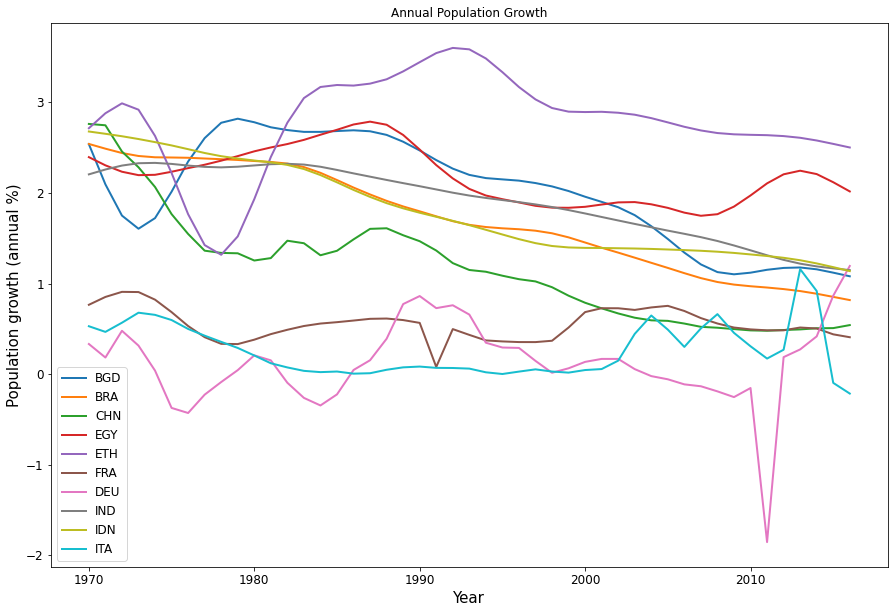

In [16]:
ax = ind_2_1.plot(linewidth=2, fontsize=12, figsize=(15,10));
# Additional customizations
ax.set_xlabel('Year',fontsize=15);
ax.set_ylabel('Population growth (annual %)',fontsize=15);
ax.legend(fontsize=12);
# ax.title(" ")
ax.title.set_text('Annual Population Growth')


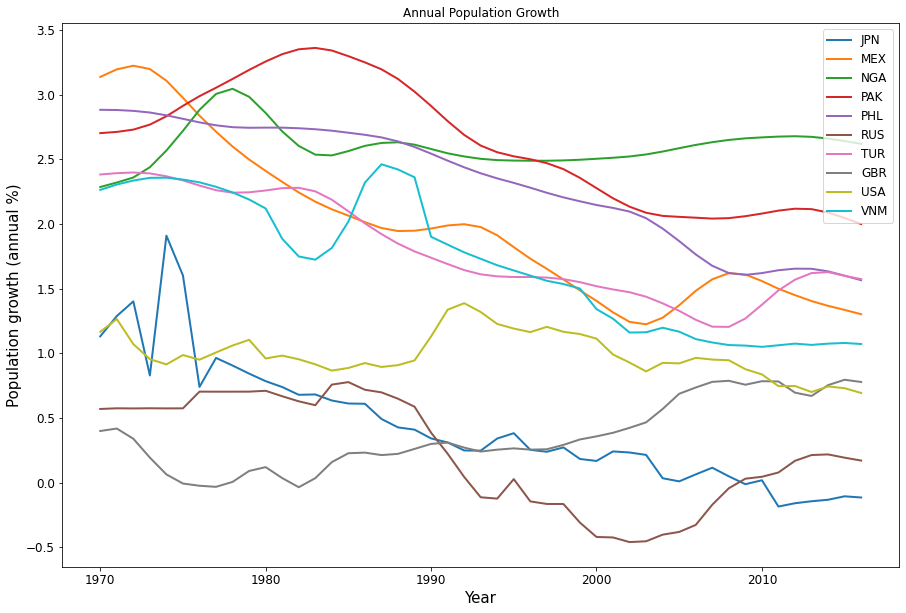

In [17]:
ax = ind_2_2.plot(linewidth=2, fontsize=12, figsize=(15,10));
# Additional customizations
ax.set_xlabel('Year',fontsize=15);
ax.set_ylabel('Population growth (annual %)',fontsize=15);
ax.legend(fontsize=12);
ax.title.set_text('Annual Population Growth')

# Looking at the above two time series graphs
### From the first graph we see that country, "ETH" has been having the highest population growth, also conties like 'FRA','ITA' and 'DEU' have a low but stable population increase but other countries population are decreasing
### From the second graph we see that country "NGA" has been having the highest and stable population growth and also we can see that all the countries in the second graph are having a population increase although the annual rate have getting low lately.

# Indicator 3 (Population, ages 15-24, total)

In [18]:
ind3 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[2]] 
ind3 = ind3[ind3["Country Code"].isin( top_20)]
ind3 = ind3.dropna(axis=1, how='all') #Droping nan columns
# ind3


ind3 = ind3.T 
ind3.columns = ind3.iloc[1,:]
ind_3 = ind3.iloc[4:,:]
ind_3.index.names = ['Year']
ind_3 = ind_3.iloc[:-1 , :]
ind_3


Country Code,BGD,BRA,CHN,EGY,ETH,FRA,DEU,IND,IDN,ITA,JPN,MEX,NGA,PAK,PHL,RUS,TUR,GBR,USA,VNM
Year,,,,,,,,,,,,,,,,,,,,
1990,22968853.0,28911403.0,251916129.0,10198274.0,9810557.0,8516730.0,10863363.0,164495877.0,37925781.0,8823806.0,18787378.0,18112978.0,17572445.0,20448198.0,12484776.0,19872588.0,11671981.0,8417500.0,37454507.0,13491050.0
1991,23373537.0,29280619.0,248248163.0,10482807.0,10134432.0,8429131.0,10448085.0,167963559.0,38541798.0,8688872.0,18916827.0,18521833.0,18120627.0,20856161.0,12768947.0,19985320.0,11928489.0,8186433.0,37093450.0,13711534.0
1992,23766446.0,29721262.0,242313919.0,10798183.0,10469650.0,8313465.0,10061829.0,171541891.0,39105155.0,8550975.0,18950892.0,18888259.0,18689802.0,21242206.0,13060276.0,20214621.0,12188858.0,7949415.0,36867790.0,13940892.0
1993,24166839.0,30230580.0,234894374.0,11138978.0,10813976.0,8182590.0,9720192.0,175207403.0,39625208.0,8401015.0,18885251.0,19209503.0,19286514.0,21661769.0,13356798.0,20535248.0,12445343.0,7720689.0,36776167.0,14177243.0
1994,24600171.0,30799828.0,227070980.0,11497187.0,11164204.0,8054577.0,9438136.0,178927155.0,40116307.0,8224786.0,18719750.0,19485091.0,19919872.0,22188457.0,13655730.0,20912833.0,12687376.0,7516914.0,36808781.0,14416869.0
1995,25083929.0,31417160.0,219707216.0,11865733.0,11518412.0,7943067.0,9225741.0,182673275.0,40587707.0,8013800.0,18458070.0,19714122.0,20595655.0,22873854.0,13954876.0,21318881.0,12906729.0,7350760.0,36956230.0,14657426.0
1996,25623943.0,32085513.0,212941470.0,12240991.0,11875776.0,7850995.0,9089362.0,186437855.0,41043332.0,7765682.0,18094770.0,19902143.0,21315097.0,23731357.0,14253651.0,21731034.0,13102389.0,7226240.0,37217230.0,14896387.0
1997,26212744.0,32792498.0,206789020.0,12620345.0,12238221.0,7776167.0,9027129.0,190214853.0,41476374.0,7489705.0,17638125.0,20047376.0,22073638.0,24741673.0,14552097.0,22141260.0,13274901.0,7143313.0,37589995.0,15135676.0
1998,26837576.0,33490994.0,201821525.0,12998551.0,12609940.0,7720623.0,9029017.0,193980338.0,41872541.0,7203151.0,17123669.0,20134380.0,22863918.0,25881490.0,14849418.0,22551157.0,13419801.0,7104612.0,38061614.0,15382332.0


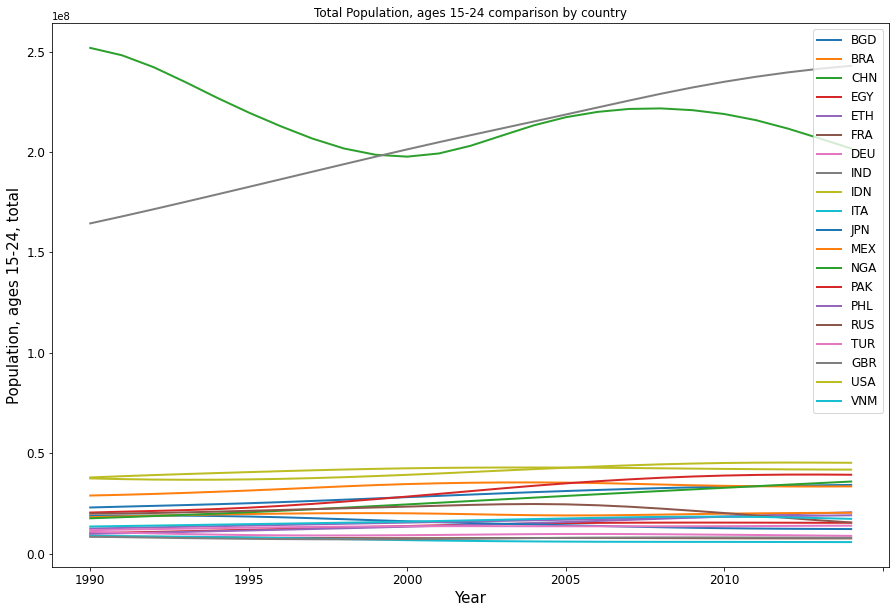

In [19]:
ax = ind_3.plot(linewidth=2, fontsize=12, figsize=(15,10));
# Additional customizations
ax.set_xlabel('Year',fontsize=15);
ax.set_ylabel('Population, ages 15-24, total',fontsize=15);
ax.legend(fontsize=12);
ax.title.set_text('Total Population, ages 15-24 comparison by country')

# From the above Time series graph analysing population aged 15-24, shows "IND": India has a the highest population and and the highest increase over the years, it is followed by "NGA": Nigeria with also a high young population which has been a bit constant lately

# Indicator 4 (Population of the official age for secondary education, both sexes (number))

In [20]:
ind4 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[3]] 
ind4 = ind4[ind4["Country Code"].isin( top_20)]
ind4 = ind4.dropna(axis=1, how='all') #Droping nan columns
ind4 = ind4.interpolate(method ='linear', limit_direction ='backward', limit = 1) # Using interpolation to fill the missing values
# ind4 = ind4.interpolate(method ='linear', limit_direction ='forward', limit = 1)



ind4 = ind4.T 
ind4.columns = ind4.iloc[1,:]
ind_4 = ind4.iloc[4:,:]
ind_4.index.names = ['Year']
ind_4 = ind_4.iloc[:-1 , :]
ind_4

Country Code,BGD,BRA,CHN,EGY,ETH,FRA,DEU,IND,IDN,ITA,JPN,MEX,NGA,PAK,PHL,RUS,TUR,GBR,USA,VNM
Year,,,,,,,,,,,,,,,,,,,,
1970,10225364.0,40992530.0,71759696.0,4400339.0,3467137.0,5755249.0,9868735.0,86044920.0,13471684.0,6353634.0,10430089.0,7249411.0,8091096.0,8371517.0,3540326.0,18052904.0,4917303.0,5348766.0,24115752.0,5975410.0
1971,10438932.0,40075702.0,69712472.0,4571243.0,3550626.0,5761401.0,10087639.0,88001976.0,14185531.0,6380910.0,10086355.0,7492426.0,8313632.0,8775473.0,3619386.0,18126436.0,5011153.0,5419460.0,24561324.0,6245621.0
1972,10712003.0,39747489.5,68782976.0,4711269.0,3637836.0,5807957.0,10334695.0,89667368.0,14888779.0,6455845.0,9810176.0,7695672.0,8515569.0,9169017.0,3686855.0,18085664.0,5072909.0,5556665.0,24939580.0,6497212.0
1973,11065974.0,40314559.0,69563144.0,4860117.0,3740567.0,5858339.0,10575716.0,91417136.0,15598802.0,6559236.0,9615529.0,7895883.0,8736277.0,9568842.0,3765539.0,17883808.0,5149863.0,5719263.0,25198996.0,6720096.0
1974,11497797.0,41707254.5,71916712.0,5008862.0,3853167.0,5904251.0,10808716.0,93360760.0,16286483.0,6680900.0,9494020.0,8106217.0,8978540.0,9975065.0,3855339.0,17549200.0,5236882.0,5892575.0,25352640.0,6914503.0
1975,11982838.0,43639483.0,75296128.0,5156030.0,3969391.0,5947727.0,11024081.0,95445152.0,16941496.0,6811528.0,9462837.0,8330936.0,9247341.0,10379623.0,3954979.0,17096150.0,5330679.0,6075722.0,25421680.0,7082930.0
1976,12531959.0,45783719.5,79035480.0,5294309.0,4087532.0,5984548.0,11208092.0,97592120.0,17553732.0,6943031.0,9527206.0,8572535.0,9539416.0,10777980.0,4061734.0,16544061.0,5426519.0,6254213.0,25397516.0,8325577.0
1977,13065335.0,57203527.5,101341720.0,5382585.0,4138531.0,5999275.0,11428767.0,99536976.0,18090774.0,7059000.0,9622189.0,8773594.0,9800689.0,11168871.0,4163051.0,15950254.0,5509435.0,6415822.0,25313316.0,8480170.0
1978,13568827.0,69168949.5,124769072.0,5476534.0,4166610.0,6004619.0,11581472.0,101559192.0,18604508.0,7166814.0,9759179.0,9012125.0,10078625.0,11564356.0,4261570.0,15333423.0,5596875.0,6537295.0,25140368.0,8634687.0


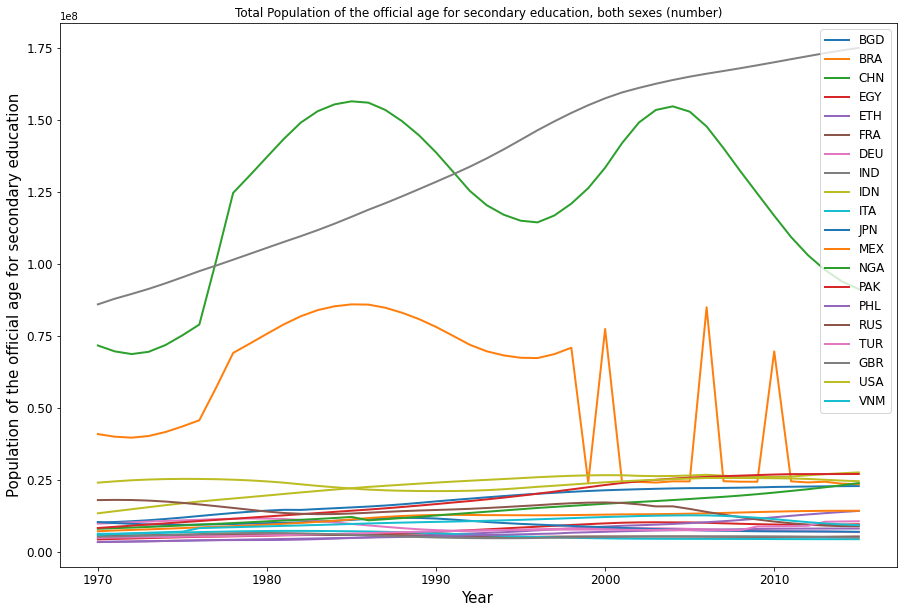

In [21]:
ax = ind_4.plot(linewidth=2, fontsize=12, figsize=(15,10));
# Additional customizations
ax.set_xlabel('Year',fontsize=15);
ax.set_ylabel('Population of the official age for secondary education',fontsize=15);
ax.legend(fontsize=12);
ax.title.set_text('Total Population of the official age for secondary education, both sexes (number)')

# Now focusing on the "Population of the official age for secondary education" we see that 'NGA': Nigeria and 'IND': India have highest although India's have a constant increase

# Indicator 5 (Population of the official age for upper secondary education, both sexes (number))

In [22]:
ind5 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[4]] 
ind5 = ind5[ind5["Country Code"].isin( top_20)]
ind5 = ind5.dropna(axis=1, how='all') #Droping nan columns
ind5 = ind5.interpolate(method ='linear', limit_direction ='backward', limit = 1) # Using interpolation to fill the missing values

# ind5

ind5 = ind5.T 
ind5.columns = ind5.iloc[1,:]
ind_5 = ind5.iloc[4:,:]
ind_5.index.names = ['Year']
ind_5 = ind_5.iloc[:-1 , :]
ind_5


Country Code,BGD,BRA,CHN,EGY,ETH,FRA,DEU,IND,IDN,ITA,JPN,MEX,NGA,PAK,PHL,RUS,TUR,GBR,USA,VNM
Year,,,,,,,,,,,,,,,,,,,,
1970,2545523.0,19773633.5,37001744.0,2062306.0,2248884.0,2465535.0,3095874.0,47472272.0,6203628.0,3922741.0,5486886.0,3425480.0,2144821.0,4395844.0,848962.0,4940848.0,2375788.0,2988617.0,11705930.0,2757869.0
1971,2591874.0,19200173.0,35808472.0,2134354.0,2297009.0,2458197.0,3170117.0,48700800.0,6523194.0,3913208.0,5288434.0,3556807.0,2187144.0,4630848.0,876150.0,5044596.0,2426392.0,3002704.0,11976769.0,2904183.0
1972,2649071.0,18610587.5,34572104.0,2204141.0,2348316.0,2477031.0,3246944.0,49582344.0,6855346.0,3935799.0,5110484.0,3655881.0,2229434.0,4871425.0,890638.0,5147820.0,2451713.0,3054337.0,12233168.0,3048946.0
1973,2720414.0,18246699.0,33772984.0,2292046.0,2409855.0,2494013.0,3316076.0,50436568.0,7218204.0,3979411.0,4938553.0,3750313.0,2285214.0,5109685.0,908151.0,5215121.0,2486495.0,3121044.0,12453842.0,3184348.0
1974,2812158.0,18481821.0,34151484.0,2383617.0,2476855.0,2504094.0,3381913.0,51413376.0,7604862.0,4038403.0,4783967.0,3850530.0,2351301.0,5342208.0,925731.0,5236446.0,2527407.0,3197024.0,12630815.0,3302803.0
1975,2935955.0,19338105.5,35740256.0,2470549.0,2545330.0,2515696.0,3450370.0,52514936.0,7990123.0,4109237.0,4685497.0,3956691.0,2426236.0,5570893.0,945821.0,5189401.0,2572735.0,3291759.0,12751807.0,3401134.0
1976,3126966.0,20404023.0,37681080.0,2544710.0,2614640.0,2533563.0,3525058.0,53736840.0,8345198.0,4194720.0,4667407.0,4070100.0,2507598.0,5802266.0,970936.0,5081361.0,2620923.0,3406383.0,12804739.0,3386510.0
1977,3330547.0,20499781.5,37669016.0,2585960.0,2649439.0,2549439.0,3637359.0,54917200.0,8635008.0,4292748.0,4692199.0,4162414.0,2580952.0,6034481.0,997318.0,4963095.0,2664345.0,3541321.0,12828192.0,3462256.0
1978,3528063.0,30657421.5,57786780.0,2632675.0,2674875.0,2568767.0,3745439.0,56154648.0,8893367.0,4399038.0,4763307.0,4272193.0,2657308.0,6266097.0,1022796.0,4850737.0,2709553.0,3668650.0,12844340.0,3536591.0


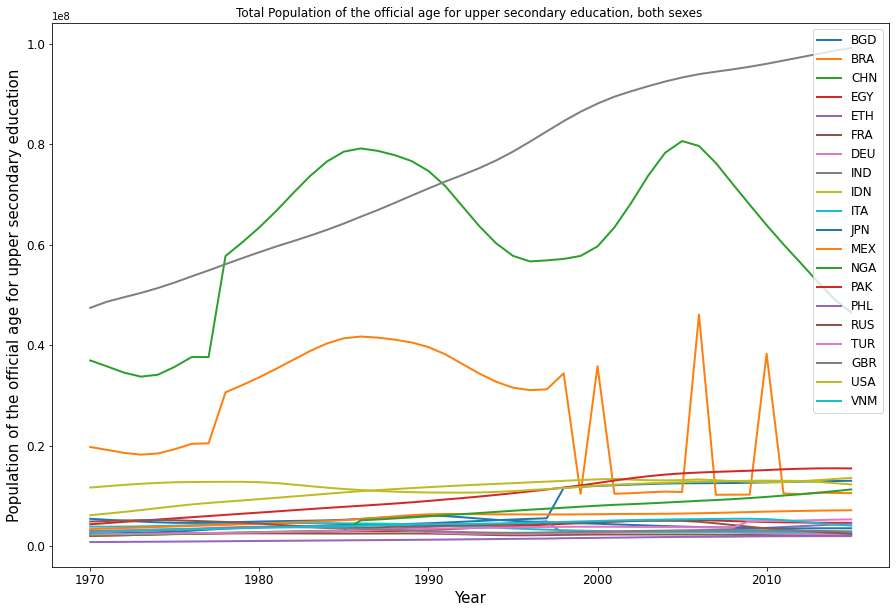

In [23]:
ax = ind_5.plot(linewidth=2, fontsize=12, figsize=(15,10));
# Additional customizations
ax.set_xlabel('Year',fontsize=15);
ax.set_ylabel('Population of the official age for upper secondary education',fontsize=15);
ax.legend(fontsize=12);
ax.title.set_text('Total Population of the official age for upper secondary education, both sexes ')

# With focus on Population of the official age for upper secondary education we can see that also 'NGA': Nigeria and 'IND': India have highest although India's have a constant increase

# Indicator 6 (Population of the official age for tertiary education, both sexes (number))

In [24]:
ind6 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[5]] 
ind6 = EdStatsData[EdStatsData["Indicator_Code"] ==  population_indicators[4]] 
ind6 = ind6[ind6["Country Code"].isin( top_20)]
ind6 = ind6.dropna(axis=1, how='all') #Droping nan columns
ind6 = ind6.interpolate(method ='linear', limit_direction ='backward', limit = 1) # Using interpolation to fill the missing values

# ind5

ind6 = ind6.T 
ind6.columns = ind6.iloc[1,:]
ind_6 = ind5.iloc[4:,:]
ind_6.index.names = ['Year']
ind_6 = ind_6.iloc[:-1 , :]
ind_6


Country Code,BGD,BRA,CHN,EGY,ETH,FRA,DEU,IND,IDN,ITA,JPN,MEX,NGA,PAK,PHL,RUS,TUR,GBR,USA,VNM
Year,,,,,,,,,,,,,,,,,,,,
1970,2545523.0,19773633.5,37001744.0,2062306.0,2248884.0,2465535.0,3095874.0,47472272.0,6203628.0,3922741.0,5486886.0,3425480.0,2144821.0,4395844.0,848962.0,4940848.0,2375788.0,2988617.0,11705930.0,2757869.0
1971,2591874.0,19200173.0,35808472.0,2134354.0,2297009.0,2458197.0,3170117.0,48700800.0,6523194.0,3913208.0,5288434.0,3556807.0,2187144.0,4630848.0,876150.0,5044596.0,2426392.0,3002704.0,11976769.0,2904183.0
1972,2649071.0,18610587.5,34572104.0,2204141.0,2348316.0,2477031.0,3246944.0,49582344.0,6855346.0,3935799.0,5110484.0,3655881.0,2229434.0,4871425.0,890638.0,5147820.0,2451713.0,3054337.0,12233168.0,3048946.0
1973,2720414.0,18246699.0,33772984.0,2292046.0,2409855.0,2494013.0,3316076.0,50436568.0,7218204.0,3979411.0,4938553.0,3750313.0,2285214.0,5109685.0,908151.0,5215121.0,2486495.0,3121044.0,12453842.0,3184348.0
1974,2812158.0,18481821.0,34151484.0,2383617.0,2476855.0,2504094.0,3381913.0,51413376.0,7604862.0,4038403.0,4783967.0,3850530.0,2351301.0,5342208.0,925731.0,5236446.0,2527407.0,3197024.0,12630815.0,3302803.0
1975,2935955.0,19338105.5,35740256.0,2470549.0,2545330.0,2515696.0,3450370.0,52514936.0,7990123.0,4109237.0,4685497.0,3956691.0,2426236.0,5570893.0,945821.0,5189401.0,2572735.0,3291759.0,12751807.0,3401134.0
1976,3126966.0,20404023.0,37681080.0,2544710.0,2614640.0,2533563.0,3525058.0,53736840.0,8345198.0,4194720.0,4667407.0,4070100.0,2507598.0,5802266.0,970936.0,5081361.0,2620923.0,3406383.0,12804739.0,3386510.0
1977,3330547.0,20499781.5,37669016.0,2585960.0,2649439.0,2549439.0,3637359.0,54917200.0,8635008.0,4292748.0,4692199.0,4162414.0,2580952.0,6034481.0,997318.0,4963095.0,2664345.0,3541321.0,12828192.0,3462256.0
1978,3528063.0,30657421.5,57786780.0,2632675.0,2674875.0,2568767.0,3745439.0,56154648.0,8893367.0,4399038.0,4763307.0,4272193.0,2657308.0,6266097.0,1022796.0,4850737.0,2709553.0,3668650.0,12844340.0,3536591.0


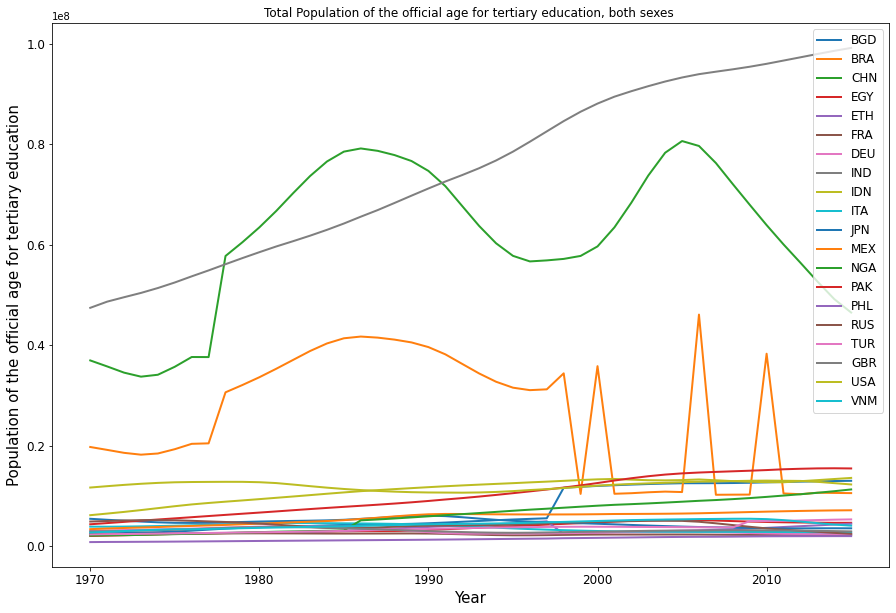

In [25]:
ax = ind_6.plot(linewidth=2, fontsize=12, figsize=(15,10));
# Additional customizations
ax.set_xlabel('Year',fontsize=15);
ax.set_ylabel('Population of the official age for tertiary education',fontsize=15);
ax.legend(fontsize=12);
ax.title.set_text('Total Population of the official age for tertiary education, both sexes ')

# Conclusion

#### After cleaning we looked for countires with the highest population, after getting the top 20 highly populated countries we started analysing indicators that focus on population that should be in high school and university

#### Resuts showed that two countries have a high potential compared to others and the countries are 'India' and 'Nigeria'.

#### For other countries in the top 20 of populated countries the customer potential is the same and there is not much evolution 

#### One Should setup first in India since, it not only have high population number in university and high schools, that population is also increasing very much.